# DATA 620 Assignment 4
### 2-mode network analysis
### Steven Ellingson


Using a network that is built into the networkX package, we will take a look at a 2-mode graph.

The network consists of women in the 1930s and their attendance at various social gatherings.


In [88]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']
[x for x in G.edges][:5]

[('Evelyn Jefferson', 'E1'),
 ('Evelyn Jefferson', 'E2'),
 ('Evelyn Jefferson', 'E3'),
 ('Evelyn Jefferson', 'E4'),
 ('Evelyn Jefferson', 'E5')]

First lets draw the graph as is.  We'll use a different size and color to differentiate the node types.

In [89]:
color_map = []
size_map = []
for node in G:
    if node in women:
        color_map.append('lightblue')
        size_map.append(6000)
    if node in clubs:
        color_map.append('lightgreen')
        size_map.append(1000)

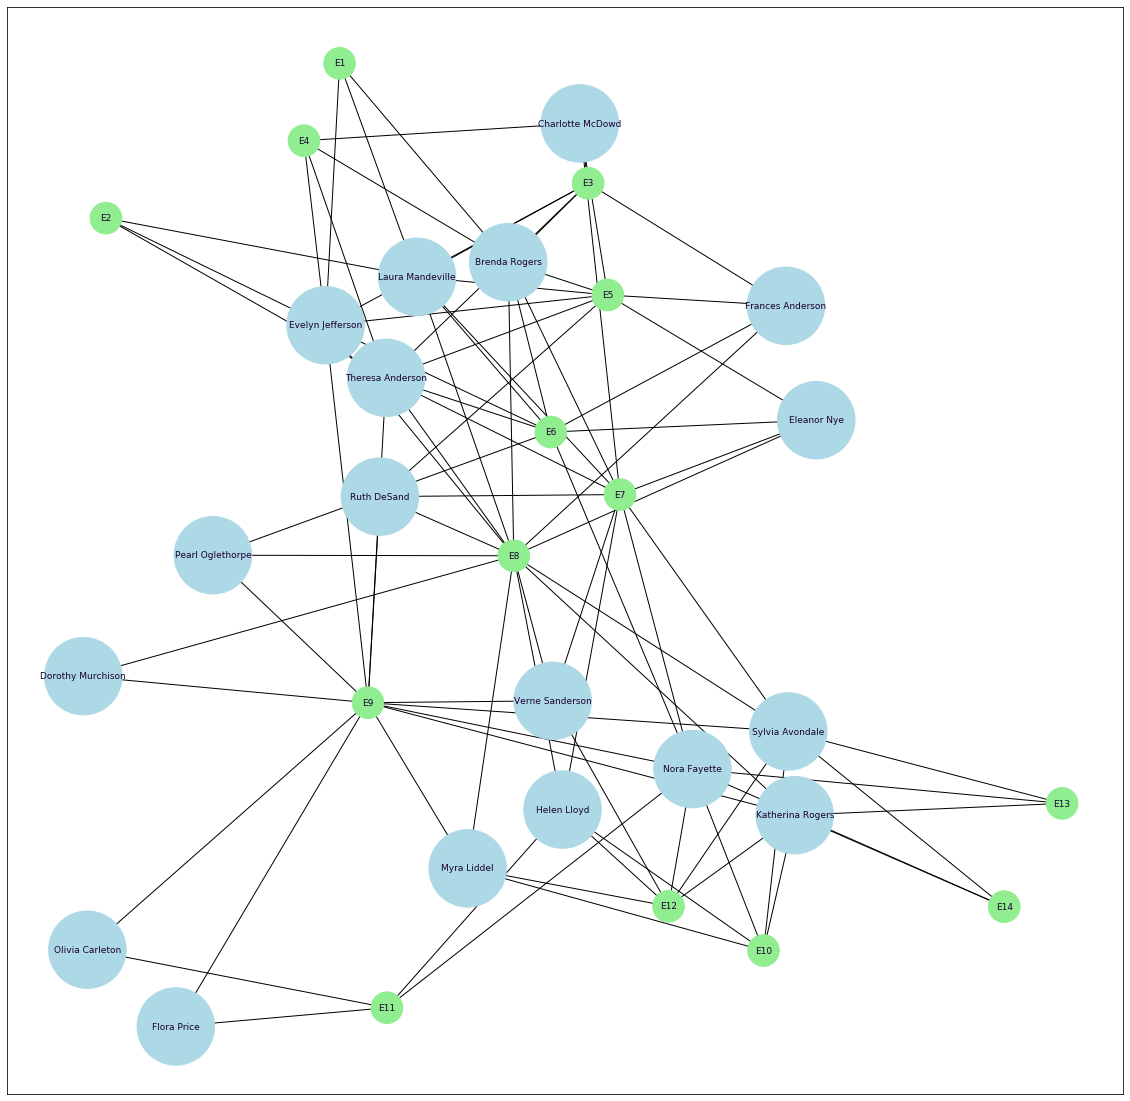

In [90]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G, with_labels=True,
                 node_size = size_map,
                 node_color = color_map,
                 font_size = 9,
                 font_color = '#1a0033'
                 )
plt.show()

We'll start with a weighted graph of the clubs.

In [91]:
C = bipartite.weighted_projected_graph(G, clubs)

In [92]:
c_edge_list = [[u,v,C.get_edge_data(u,v)['weight']] for u,v in C.edges]
c_edge_df = pd.DataFrame.from_records(c_edge_list, columns = ['source','target','weight'])
c_edge_df.sort_values('weight', ascending=False).head(10)

,source,target,weight
48,E8,E9,9
44,E7,E8,8
28,E5,E8,7
37,E6,E8,7
15,E3,E5,6
27,E5,E7,6
29,E5,E6,6
54,E9,E12,5
34,E6,E7,5
59,E10,E12,5


The 4 heaviest edges all involve event 8, and the next three involve 5.  Event 12 shows up twice after that.

In [93]:
c_edge_df.sort_values('weight', ascending=True).head(10)

,source,target,weight
32,E6,E10,1
35,E6,E12,1
36,E6,E11,1
50,E8,E11,1
30,E6,E14,1
60,E11,E14,1
61,E11,E13,1
31,E6,E13,1
3,E1,E9,1
2,E1,E4,2


At the bottom edge we have a lot of single matches.  Event 6 shows up a lot on these. Let's draw the projected graph.

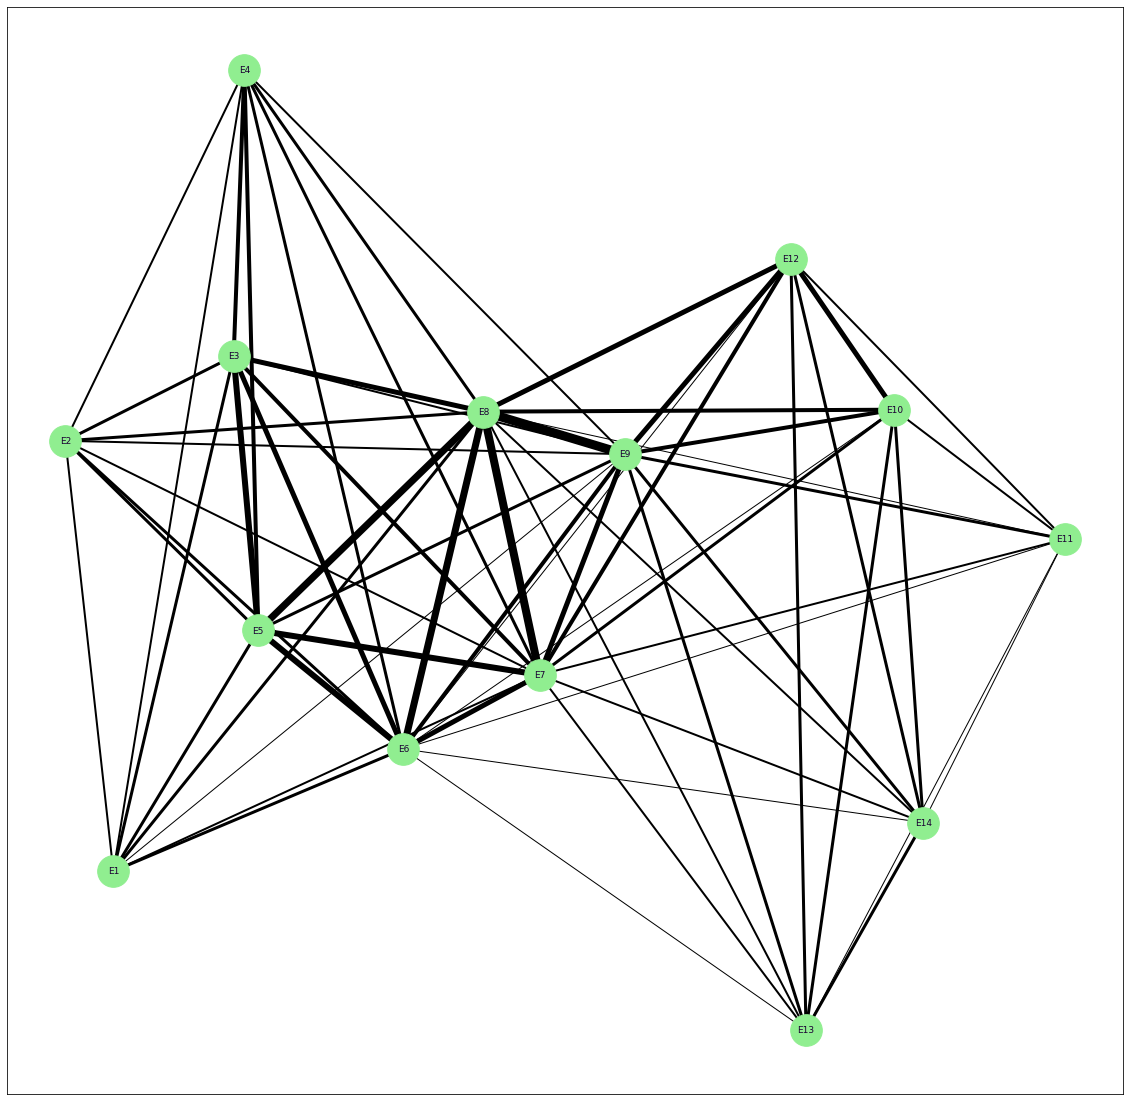

In [94]:
plt.figure(figsize=(20,20))
nx.draw_networkx(C, with_labels=True,
                 node_size = 1000,
                 font_size = 9,
                 node_color= 'lightgreen',
                 font_color = '#1a0033',
                 width = c_edge_df['weight']
                 )

plt.show()

Event 8 does seem to be at the center, with 3,5,6,7 and 9 also having a lot of strong connections as well.

Let's employ the Island method and remove the weaker connections.

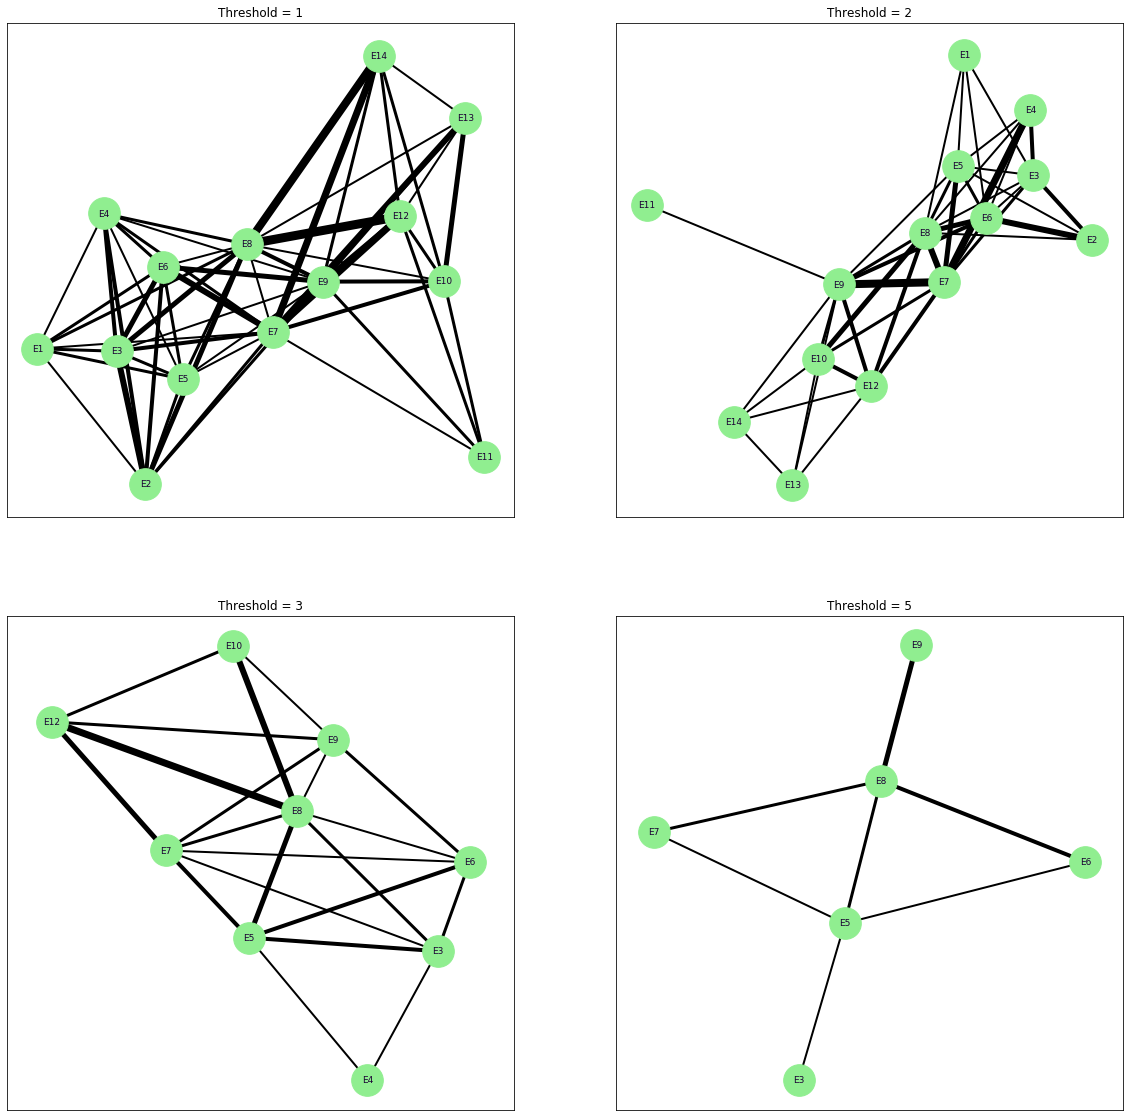

In [112]:
plt.figure(figsize=(20,20))
G=nx.grid_2d_graph(4,4)  #4x4 grid

i = 0
for t in [1, 2, 3, 5]:
    i = i + 1
    plt.subplot(220+i)
    plt.title("Threshold = " + str(t))
    filtered_df = c_edge_df[c_edge_df['weight']>t]
    G1=nx.Graph()
    G1.add_weighted_edges_from(filtered_df.values.tolist())
    nx.draw_networkx(G1, with_labels=True,
                     node_size = 1000,
                     font_size = 9,
                     node_color= 'lightgreen',
                     font_color = '#1a0033',
                     width = (filtered_df['weight']-t+1)
                     )

plt.savefig("four_grids.png")
plt.show()

So, we don't seem to have any separate islands, the graph just keeps trimming down the center as our threshold goes up.  Events 3,5,6,7,8 and 9 end up being a lone island at the end.

Now we can do the same for the Women.

In [95]:
W = bipartite.weighted_projected_graph(G, women)

In [96]:
w_edge_list = [[u,v,W.get_edge_data(u,v)['weight']] for u,v in W.edges]
w_edge_df = pd.DataFrame.from_records(w_edge_list, columns = ['source','target','weight'])
w_edge_df.sort_values('weight', ascending=False).head(10)
#w_edge_df.head(10)

,source,target,weight
0,Evelyn Jefferson,Theresa Anderson,7
7,Evelyn Jefferson,Brenda Rogers,6
15,Evelyn Jefferson,Laura Mandeville,6
23,Laura Mandeville,Brenda Rogers,6
17,Laura Mandeville,Theresa Anderson,6
37,Theresa Anderson,Brenda Rogers,6
122,Katherina Rogers,Sylvia Avondale,6
127,Sylvia Avondale,Nora Fayette,6
121,Katherina Rogers,Nora Fayette,5
39,Theresa Anderson,Eleanor Nye,4


Evelyn, Theresa, Brenda, and Laura clearly go to a lot of the same social events.  Katherina, Nora, and Sylvia look to be a separate, closely connected group.

In [97]:
w_edge_df.sort_values('weight', ascending=True).head(10)

,source,target,weight
31,Theresa Anderson,Flora Price,1
82,Eleanor Nye,Katherina Rogers,1
61,Charlotte McDowd,Nora Fayette,1
118,Katherina Rogers,Flora Price,1
117,Myra Liddel,Olivia Carleton,1
79,Eleanor Nye,Myra Liddel,1
111,Myra Liddel,Flora Price,1
110,Verne Sanderson,Olivia Carleton,1
102,Ruth DeSand,Olivia Carleton,1
75,Eleanor Nye,Dorothy Murchison,1


A lot of single matches here, with a few common names.

Let's draw the weighted graph

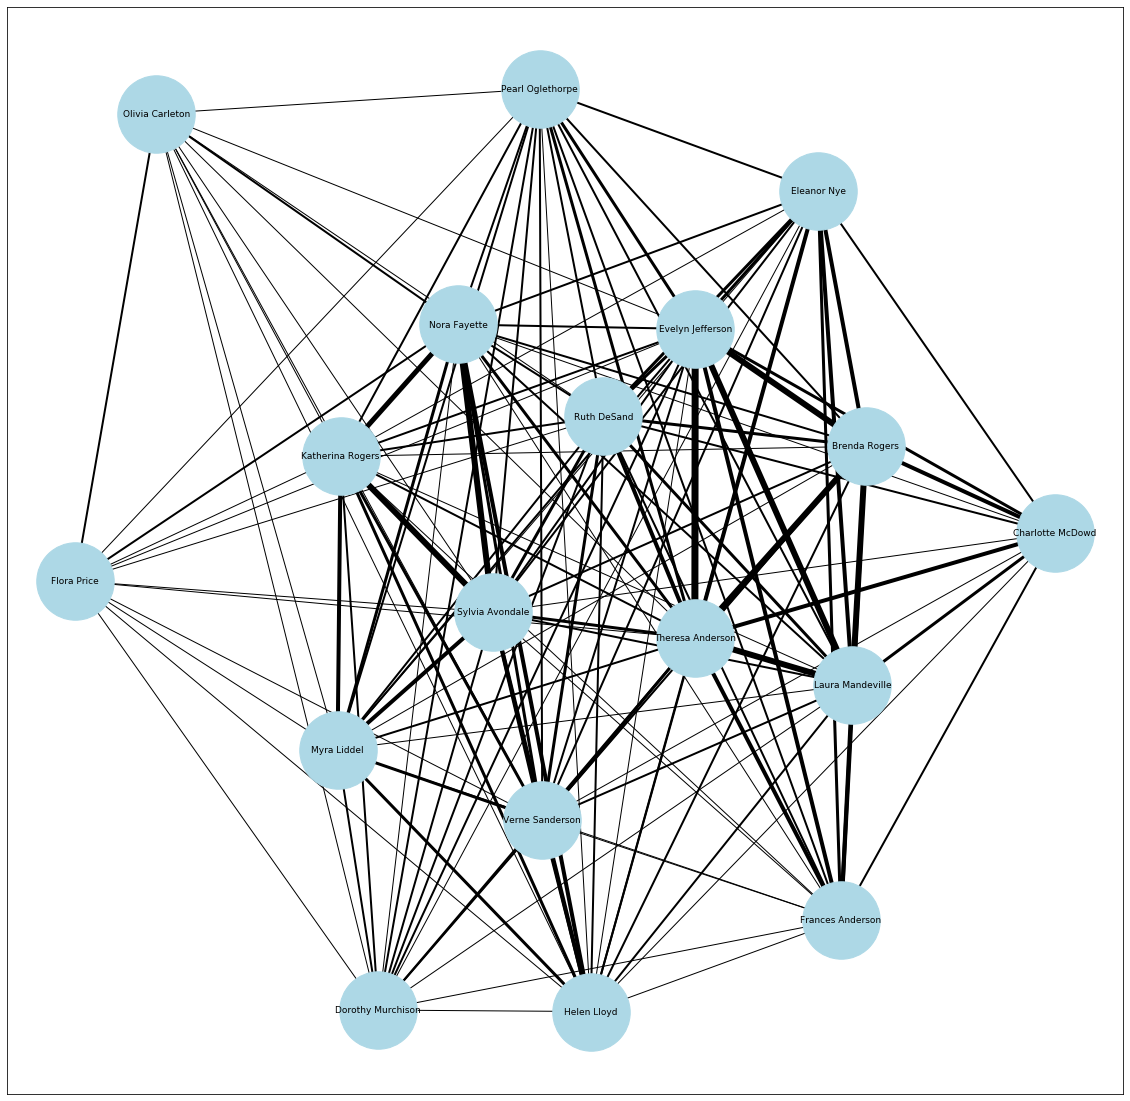

In [98]:

plt.figure(figsize=(20,20))
nx.draw_networkx(W, with_labels=True,
                 node_size = 6000,
                 font_size = 9,
                 node_color = 'lightblue',
                 width = w_edge_df['weight']
                 )

plt.show()

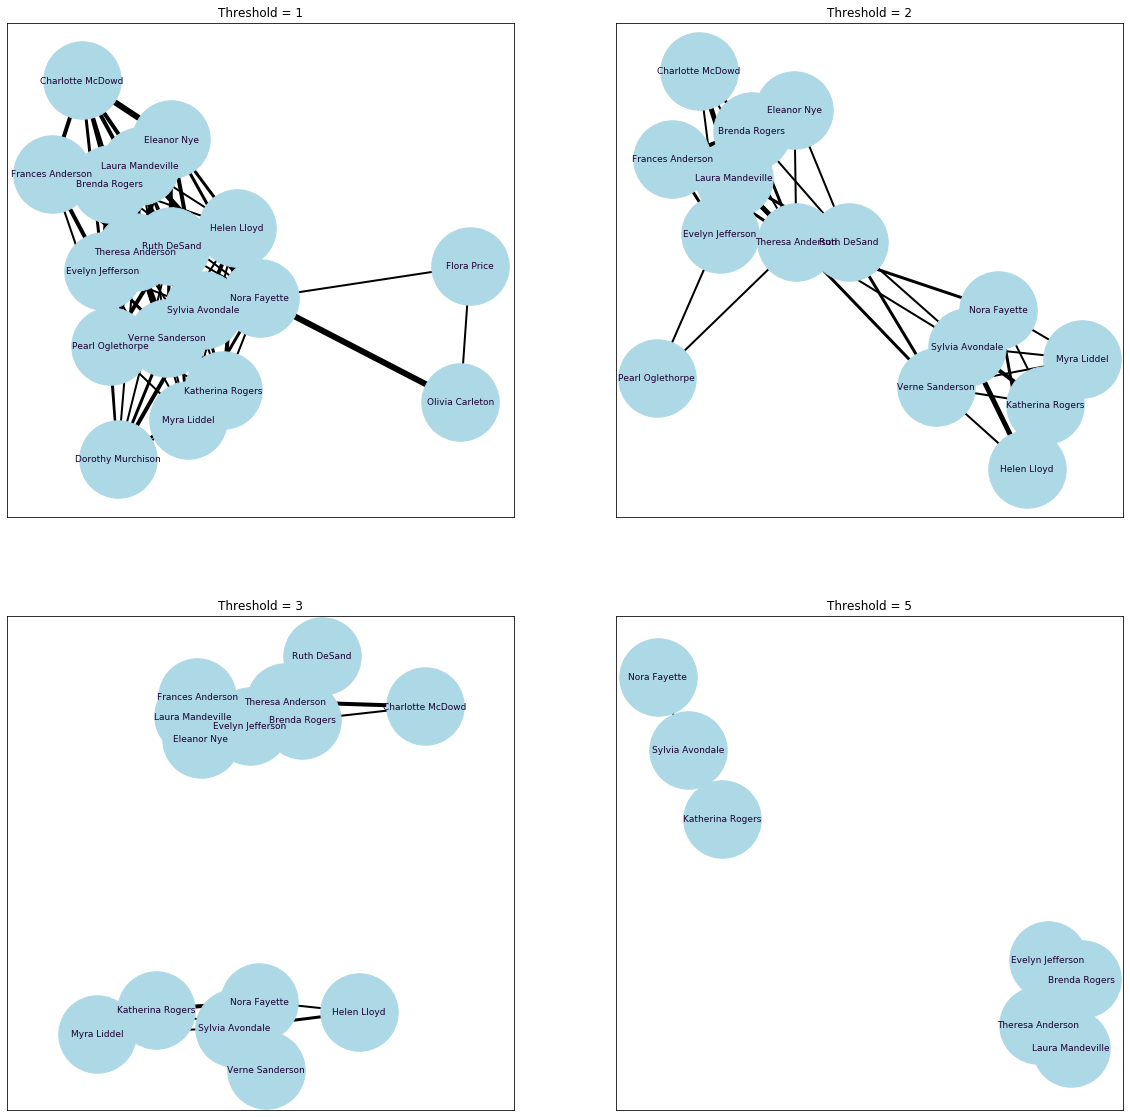

In [116]:
plt.figure(figsize=(20,20))
G=nx.grid_2d_graph(4,4)  #4x4 grid

i = 0
for t in [1, 2, 3, 5]:
    i = i + 1
    plt.subplot(220+i)
    plt.title("Threshold = " + str(t))
    filtered_df = w_edge_df[w_edge_df['weight']>t]
    G1=nx.Graph()
    G1.add_weighted_edges_from(filtered_df.values.tolist())
    nx.draw_networkx(G1, with_labels=True,
                     node_size = 6000,
                     font_size = 9,
                     node_color= 'lightblue',
                     font_color = '#1a0033',
                     width = (filtered_df['weight']-t+1)
                     )

plt.show()



This is much more interesting than the events!  We clearly have two distinct islands.  If you look at the last graph you'll see the two groups of names I mentioned above.  Theresa and Ruth seem to be the connection between the two, but even those connections go away at a threshold of 3.

# Conclusions
Looking at the events themselves, there seems to be one center that stays true even as you eliminate weaker connections. Looking at the Women who attend these events though, you find two distinct cliques. These cliques are very distinct and have no connections above 3.


Video Link: https://youtu.be/VLmBOEbPFYw